<a href="https://colab.research.google.com/github/ASAbuSayem/The-Boston-Housing-Dataset-in-Machine-Learning/blob/main/Boston_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Boston Housing Prediction 🏠

###Step 1: Setup

pandas, numpy, matplotlib, and sklearn installed:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Step 2: Load the Dataset

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/drive/MyDrive/ML Assignment 2024/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head())
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

###Step 3: Data Exploration and Visualization
Plot Distribution of Target Variable (MEDV)

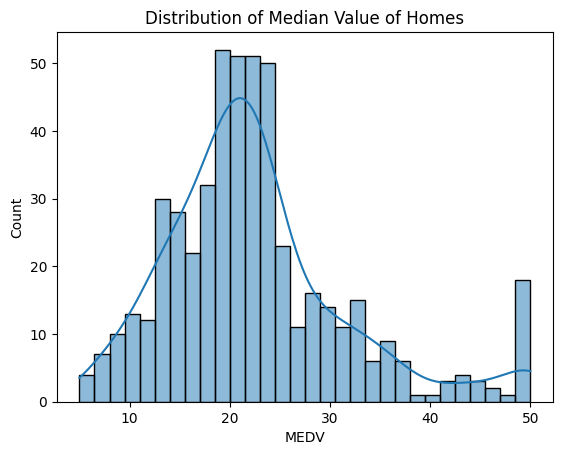

In [ ]:
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of Median Value of Homes')
plt.show()

Correlation Heatmap


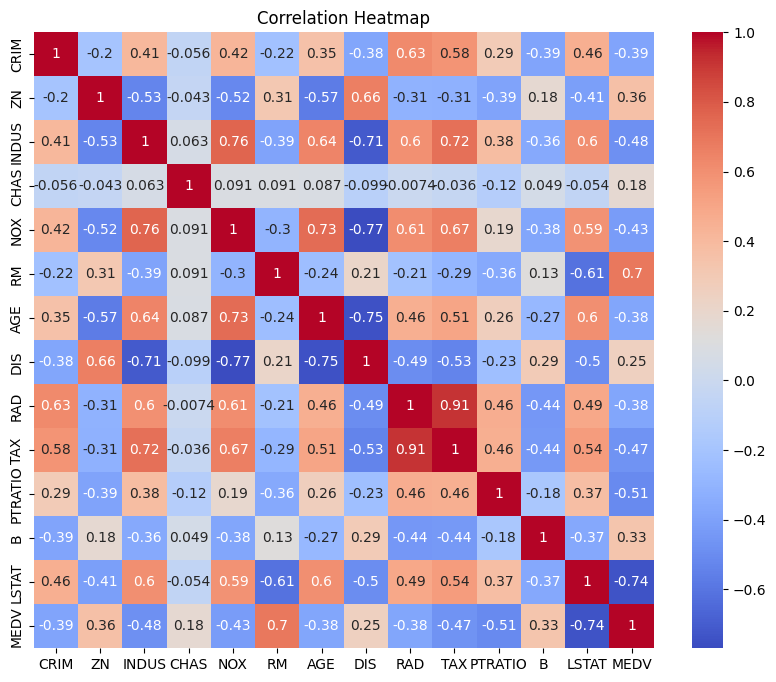

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###Step 4: Data Preprocessing


In [ ]:
# Handle any missing values
data = data.dropna()

In [ ]:
# Split the dataset into training and test sets (70% - 30%)
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Step 5: Model Selection and Training
Example with Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Step 6: Model Evaluation

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}')

MAE: 3.1627098714574013, MSE: 21.517444231177183, RMSE: 4.638689926172818, R-squared: 0.7112260057484936


###Step 7: Feature Importance (for Linear Regression)


In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
CRIM       -0.133470
ZN          0.035809
INDUS       0.049523
CHAS        3.119835
NOX       -15.417061
RM          4.057199
AGE        -0.010821
DIS        -1.385998
RAD         0.242727
TAX        -0.008702
PTRATIO    -0.910685
B           0.011794
LSTAT      -0.547113


###Step 8: Improvement Techniques (Example: Polynomial Features)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)

# Re-evaluate with Polynomial Features
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Polynomial MAE: {mae_poly}, MSE: {mse_poly}, RMSE: {rmse_poly}, R-squared: {r2_poly}')

Polynomial MAE: 3.6066853598544473, MSE: 29.806887756843697, RMSE: 5.459568458847612, R-squared: 0.5999778625530947


### Others Model

RandomForestClassifier

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier

###Step 2: Load and Split Data
Split your dataset into training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Step 3: Train the Model
Example using a RandomForest Classifier.

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###Step 4: Generate Classification Report


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.78      0.85        18
         Low       0.76      0.84      0.80        31
      Medium       0.91      0.91      0.91       103

    accuracy                           0.88       152
   macro avg       0.87      0.84      0.85       152
weighted avg       0.88      0.88      0.88       152



###Step 5: Generate Confusion Matrix and Plot It


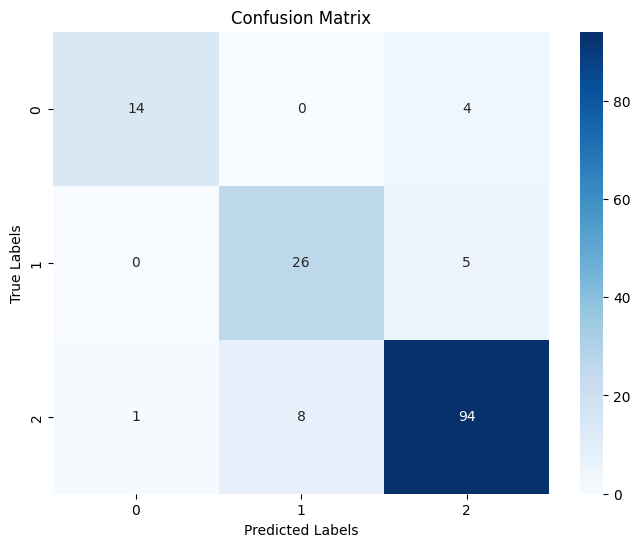

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Classification Report
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report
              precision    recall  f1-score   support

        High       0.88      0.83      0.86        18
         Low       0.61      0.71      0.66        31
      Medium       0.89      0.85      0.87       103

    accuracy                           0.82       152
   macro avg       0.79      0.80      0.80       152
weighted avg       0.83      0.82      0.83       152



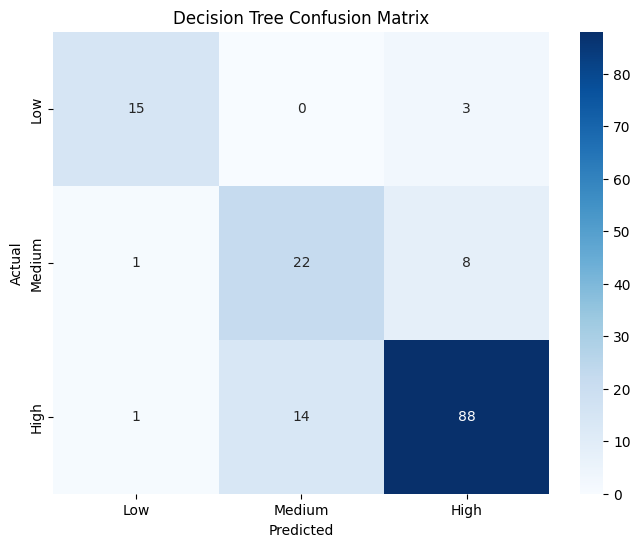

In [ ]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


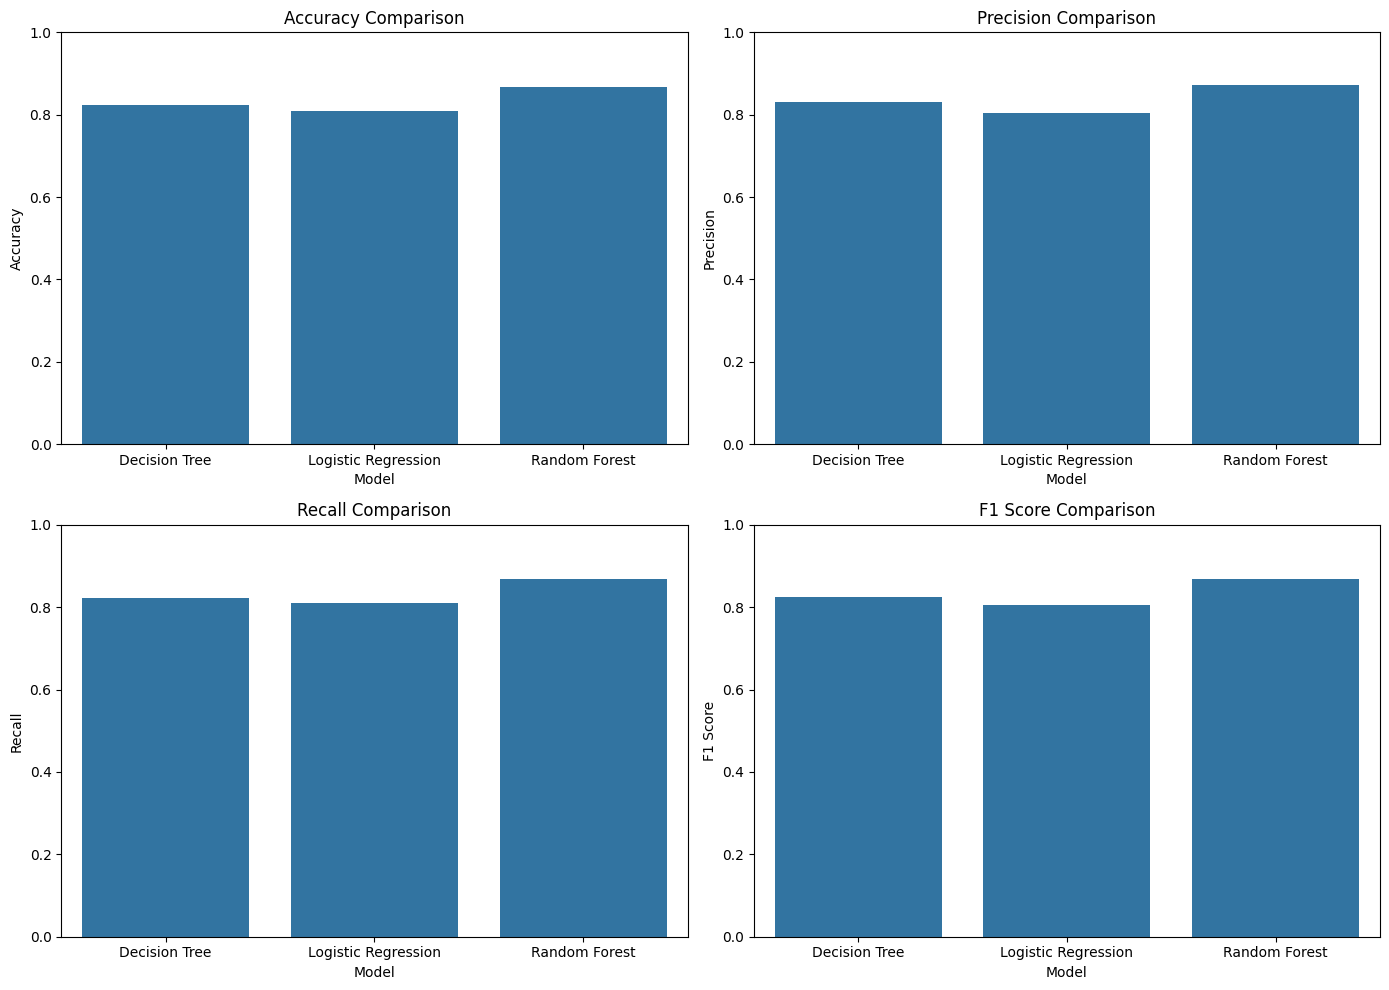

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Accuracy, Precision, Recall, and F1-Score Comparison
results = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_dt, average='weighted'),
                  precision_score(y_test, y_pred_lr, average='weighted'),
                  precision_score(y_test, y_pred_rf, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_dt, average='weighted'),
               recall_score(y_test, y_pred_lr, average='weighted'),
               recall_score(y_test, y_pred_rf, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_dt, average='weighted'),
                 f1_score(y_test, y_pred_lr, average='weighted'),
                 f1_score(y_test, y_pred_rf, average='weighted')]
}

import pandas as pd
results_df = pd.DataFrame(results)

# Plot Comparison Graphs
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_ylim(0, 1)
    ax[i//2, i%2].set_title(f'{metric} Comparison')

plt.tight_layout()
plt.show()


*Sayem*

Happy Coding 😊